In [1]:
import pytesseract
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
print(pytesseract.image_to_string(Image.open('../raw_data/label_composition_images/IMG_1378.JPG')))


  

GB: Sheil fabric: 100% polyester
racycied

Lining: 100% polyester recycled
Padding: 100% recycled content
NL: Bovenstoft: 100% polyester
gerecyciede

Voering: 100% polyester geracyelade
Valling: 100% geracycleds inhoud

GE: Oberstofft: 100% Polyaster recveett
Futter: 100% Polyester recyeait
Wattierung: 100% recycelt Inhalt |

FR: Etoffe extétieuret: 100%
polyester recycle

Doublure: 100% polyester recycle
Remplissaga: 100% recycle content

 



In [3]:
result = pytesseract.image_to_string(Image.open('../raw_data/label_composition_images/IMG_1378.JPG'))


In [4]:

images = (Image.open('../raw_data/label_composition_images/'))

In [62]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder="../raw_data/label_composition_images"

In [63]:
labels = load_images_from_folder(folder)


In [64]:
for label in labels:
    print("NEW IMAGE")
    print(pytesseract.image_to_string((label)))

NEW IMAGE
' | i) ,
‘ gy

}, 4 ? H : ”

' er & iy

\ . ‘ ; y Bs Fi
’ ° > he + . ay J t ' 5 { j
i : 4 . mali) i i 5 Rs * A “ 1 _- £ys .
is F nN a a ‘ _ q bd 1 | 2 iz y po =
MELLEL IV ELL EEE ZED) JT

 

51%COTTON 49%POLESTER

 

 

ADOBE
MADE IN CHINA
RN129860 CA00108
MACHINE WASH COLD SEPARATELY
DO NOT BLEACH
DRIP DRY IN SHADE
DO NOT TUMBLE DRY
WARM IRON ONLY
DO NOT DRY CLEAN ,
Laver a la machine a l'eau frovde
separement
Ne pas javelliser
Etendre Mouille
Ne pas sécher a la machine
Repasser au fer chaud seulement
_ Pas de nettoyane a sec

NEW IMAGE
Pw
wd

mod / ONVLAY

NYLIMNITOd / NYVHLIYNA 10d / NVHLIANA TOd / OUPIAS m10a/7 d 2%OOT

NoAgsa/ 9NzZYIEN / LNINFLINIA / OLNAWILSANATA / OLN I on MA a oe an ILwOD
YFLZSH 10d / AALS AITOd / 4AISPIOA / YALS 3

110d / y41SHA10d %OOT

N19NCAGs ONHOSA / ONINIA
ZO.

7 / UOpobye /
OMNZSIA / ISOMSIA / & NOGOS1v/NOLLOD we
— FUZSH TOA / 4FILSFTOg / eed Vv D>

SODSIAN / ASODSIA HT
J AALSAAOKA J 2UAS1 STA IOS COoGoese

  

 

9509

ren REMMI | indy Y2"



In [65]:
import cv2
import glob

#imdir = '../raw_data/label_composition_images/'
#ext = ['png', 'jpg', 'gif']    # Add image formats here

#files = []
#[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

#images = [cv2.imread(file) for file in files]

In [66]:
#images

In [67]:
#for image in images:
   # img = Image.fromarray(image, 'RGB')
    #print("new_image")
    #print(pytesseract.image_to_string((img)))

    #img.save('my.png')
    #img.show()

In [68]:
custom_config = r'-l eng --psm 6'
print(pytesseract.image_to_string('../raw_data/label_composition_images/IMG_1378.jpg'))
    


  

GB: Sheil fabrict:100% polyester
racycled

Lining: 100% polyester recycled
Padding: 100% recycled content
NL: Bovenstoft: 100% polyester
gerecyciede

Voering: 100% palyaster aaracyelade
Vlling: 100% geracycieds inhoud

DE: Oberstofft: 100% Polyester recvestt
Futter: 100% Polyester recycelt
Wattierung: 100% recycelt Inhalt

FR: Etoffe extérieuret: 100%

polyester recycle
Doublura: 100% polyester recycle
Remplissaga: 100% recycle content

 



In [69]:
#img = cv2.imread('../raw_data/label_composition_images/IMG_1387.JPG')

In [70]:
# Preprocessing the image

import cv2
import numpy as np



# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -1.000
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

def sharp(image):
    return cv2.bilateralFilter(image,9,75,75)
 

In [71]:

from scipy.ndimage import interpolation as inter

def findScore(img, angle):
    #"""
    #Generates a score for the binary image recieved dependent on the determined angle.\n
    #Vars:\n
    #- array <- numpy array of the label\n
    #- angle <- predicted angle at which the image is rotated by\n
    #Returns:\n
    #- histogram of the image
    #- score of potential angle
    #"""
    data = inter.rotate(img, angle, reshape = False, order = 0)
    hist = np.sum(data, axis = 1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

def skewCorrect(img):
    #"""
    #Takes in a nparray and determines the skew angle of the text, then corrects the skew and returns the corrected image.\n
    #Vars:\n
    #- img <- numpy array of the label\n
    #Returns:\n
    #- Corrected image as a numpy array\n
    #"""
    #Crops down the skewImg to determine the skew angle
    img = cv2.resize(img, (0, 0), fx = 0.75, fy = 0.75)
    delta = 1
    limit = 45
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = findScore(img, angle)
        scores.append(score)
    bestScore = max(scores)
    bestAngle = angles[scores.index(bestScore)]
    rotated = inter.rotate(img, bestAngle, reshape = False, order = 0)
    #print("[INFO] angle: {:.3f}".format(bestAngle))
    #cv2.imshow("Original", img)
    #cv2.imshow("Rotated", rotated)
    #cv2.waitKey(0)
    #Return img
    return rotated


In [72]:
#img = cv2.imread('../raw_data/label_composition_images/IMG_1387.JPG')

In [73]:
def preprocessing_image(image):
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    noise = cv2.medianBlur(grayscale,5)
    #threshold = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    #threshold doesn't really work
    
    #dilation
    kernel = np.ones((5,5),np.uint8)
    dilate = cv2.dilate(noise, kernel, iterations = 1)

    #erosion

    kernel = np.ones((5,5),np.uint8)
    erode= cv2.erode(dilate, kernel, iterations = 1)

#opening - erosion followed by dilation
    #def opening(image):
    #kernel = np.ones((5,5),np.uint8)
    #return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
    
    #canny = cv2.Canny(threshold, 100, 200)

#skew correction
#def deskew(image):
    coords = np.column_stack(np.where(erode > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = erode.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskew = cv2.warpAffine(erode, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    

#template matching
#def match_template(image, template):
    #return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

#def sharp(image):
    #sharp= cv2.bilateralFilter(deskew,9,75,75)
    return deskew
    

In [74]:
#grayscale = get_grayscale(img)
#noise = remove_noise(grayscale)
#sharp = sharp(noise)
#thresholding = thresholding(sharp)
#dilatation = dilate(noise)
#erode = erode(thresholding)
#opening = opening(erode)
#canny = canny(opening)

#match = match_template(deskew, template)





In [75]:
#deskew = skewCorrect(erode)

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR

‘Waist S@rstpilio riot ©
brologiatgigaat

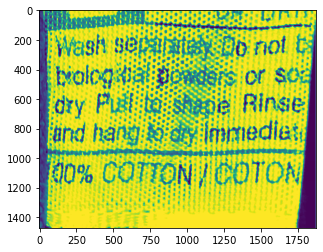

In [76]:
for label in labels:
    preprocessed = preprocessing_image(img)
    print(pytesseract.image_to_string(preprocessed,config=custom_config))
    plt.imshow(preprocessed)

In [60]:
import matplotlib.pyplot as plt 


In [56]:
#plot_image = Image.open('../raw_data/label_composition_images/IMG_1387.JPG')


‘Waist S@rstpilio riot ©
brologiatgigaaters or Soc
dry Piai:torstane Rinse
and hang: Sey Immediat,
J0% COTTON | GOTOR



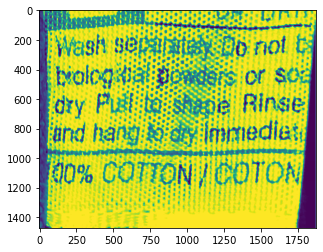

In [57]:
#plt.imshow(plot_image)
print(pytesseract.image_to_string(preprocessed,config=custom_config))
plt.imshow(preprocessed)

In [58]:
#original (no preprocessed)
print(pytesseract.image_to_string('../raw_data/label_composition_images/IMG_1387.jpg',config=custom_config))

PPAR ceiecssicee ats 2 bel Tt
Waal Seraiieycra not ©
trologitia! Sowders or $c:
Ory Psi stage Rinse
and hang © dey immedias
0% COTTON: GOTON



In [ ]:
#img = cv2.imread('../raw_data/label_composition_images/IMG_1377.jpg')

#h, w, c = img.shape
#boxes = pytesseract.image_to_boxes(img) 
#for b in boxes.splitlines():
    #b = b.split(' ')
    #img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

#cv2.imshow('img', img)
#cv2.waitKey(0)